# Practica 2: Predicción de Series Temporales

# Autores: 

- Alejandro López Cuéllar
- Miguel Ángel Vera Frutos
- Alejandro Belda Fernández


# Importación de librerías

In [2]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import os
import locale
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import boxcox
from statsmodels.tsa.stattools import adfuller
from sklearn.impute import KNNImputer
from skforecast.model_selection import backtesting_forecaster
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from sklearn.linear_model import LinearRegression
import skforecast
import random
from skforecast.ForecasterAutoregDirect import ForecasterAutoregDirect
from lightgbm import LGBMRegressor
from skforecast.metrics import root_mean_squared_scaled_error
from sklearn.metrics import mean_absolute_error,root_mean_squared_error, mean_squared_error
from skforecast.model_selection import grid_search_forecaster
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb

c:\Users\Alejandro\Desktop\Master\ML\SegundaParte\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


#  Establecer la configuración regional

Para Linux y MacOS:

In [3]:
locale.setlocale(locale.LC_TIME, "es_ES.UTF-8")

'es_ES.UTF-8'

Para Windows

In [4]:

locale.setlocale(locale.LC_TIME, "Spanish_Spain.1252")

'Spanish_Spain.1252'

# Definir semilla

In [5]:
SEED = 123
np.random.seed(SEED)
random.seed(SEED)

# Definición rutas ficheros

In [6]:
ruta = "dataset/Aljorrahorarias2017.xls"
ruta2 = "dataset/Aljorrahorarias2018.xls"
ruta3 = "dataset/Aljorrahorarias2019.xls"
ruta4 = "dataset/Aljorrahorarias2020.xls"
ruta5 = "dataset/Aljorrahorarias2021.xls"
ruta6 = "dataset/Aljorrahorarias2022.xls"


# Lectura de datos

In [7]:
# Leer el archivo completo
df = pd.read_excel(ruta, engine='xlrd', skiprows=1, parse_dates=["Fecha"], date_format="%d %b %Y %H:%M")
df["Fecha"] = df["Fecha"].dt.floor('H')

# Establecer "Fecha" como el índice
df.set_index("Fecha", inplace=True)


# Leer el archivo completo
df2 =  pd.read_excel(ruta2, engine='xlrd', skiprows=1, parse_dates=["Fecha"], date_format="%d %b %Y %H:%M")
df2["Fecha"] = df2["Fecha"].dt.floor('H')

# Establecer "Fecha" como el índice
df2.set_index("Fecha", inplace=True)

# Leer el archivo completo
df3 =  pd.read_excel(ruta3, engine='xlrd', skiprows=1, parse_dates=["Fecha"], date_format="%d %b %Y %H:%M")
df3["Fecha"] = df3["Fecha"].dt.floor('H')

# Establecer "Fecha" como el índice
df3.set_index("Fecha", inplace=True)

# Leer el archivo completo
df4 =  pd.read_excel(ruta4, engine='xlrd', skiprows=1, parse_dates=["Fecha"], date_format="%d %b %Y %H:%M")
df4["Fecha"] = df4["Fecha"].dt.floor('H')

# Establecer "Fecha" como el índice
df4.set_index("Fecha", inplace=True)

# Leer el archivo completo
df5 =  pd.read_excel(ruta5, engine='xlrd', skiprows=1, parse_dates=["Fecha"], date_format="%d %b %Y %H:%M")
# Establecer los minutos a 00, y redondear la fecha a la hora
df5["Fecha"] = df5["Fecha"].dt.floor('H')

# Establecer "Fecha" como el índice
df5.set_index("Fecha", inplace=True)

# Leer el archivo completo
df6 =  pd.read_excel(ruta6, engine='xlrd', skiprows=1, parse_dates=["Fecha"], date_format="%d %b %Y %H:%M")
# Establecer los minutos a 00, y redondear la fecha a la hora
df6["Fecha"] = df6["Fecha"].dt.floor('H')

# Establecer "Fecha" como el índice
df6.set_index("Fecha", inplace=True)




*** No CODEPAGE record, no encoding_override: will use 'iso-8859-1'


C:\Users\Alejandro\AppData\Local\Temp\ipykernel_11892\1045028487.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df["Fecha"] = df["Fecha"].dt.floor('H')


*** No CODEPAGE record, no encoding_override: will use 'iso-8859-1'


C:\Users\Alejandro\AppData\Local\Temp\ipykernel_11892\1045028487.py:11: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df2["Fecha"] = df2["Fecha"].dt.floor('H')


*** No CODEPAGE record, no encoding_override: will use 'iso-8859-1'


C:\Users\Alejandro\AppData\Local\Temp\ipykernel_11892\1045028487.py:18: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df3["Fecha"] = df3["Fecha"].dt.floor('H')


*** No CODEPAGE record, no encoding_override: will use 'iso-8859-1'


C:\Users\Alejandro\AppData\Local\Temp\ipykernel_11892\1045028487.py:25: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df4["Fecha"] = df4["Fecha"].dt.floor('H')


*** No CODEPAGE record, no encoding_override: will use 'iso-8859-1'


C:\Users\Alejandro\AppData\Local\Temp\ipykernel_11892\1045028487.py:33: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df5["Fecha"] = df5["Fecha"].dt.floor('H')


*** No CODEPAGE record, no encoding_override: will use 'iso-8859-1'


C:\Users\Alejandro\AppData\Local\Temp\ipykernel_11892\1045028487.py:41: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df6["Fecha"] = df6["Fecha"].dt.floor('H')


# Unir dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2017-01-01 00:00:00 to 2017-12-31 23:00:00
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   NO (µg/m³N)    7129 non-null   float64
 1   NO2 (µg/m³N)   7129 non-null   float64
 2   SO2 (µg/m³N)   7580 non-null   float64
 3   O3 (µg/m³N)    8715 non-null   float64
 4   TMP (ºC)       8748 non-null   float64
 5   HR (% H.R.)    8748 non-null   float64
 6   NOX (µg/m³N)   7129 non-null   float64
 7   DD (grados)    8748 non-null   float64
 8   PRB (mb)       8748 non-null   float64
 9   RS (W/m³)      8748 non-null   float64
 10  VV (m/s)       8748 non-null   float64
 11  C6H6 (µg/m³N)  0 non-null      float64
 12  C7H8 (µg/m³N)  0 non-null      float64
 13  XIL (µg/m³N)   0 non-null      float64
 14  PM10 (µg/m³N)  8747 non-null   float64
 15  Ruido (dBA)    0 non-null      float64
dtypes: float64(16)
memory usage: 1.1 MB


Como podemos ver tiene una gran cantidad de variables nulas

In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2018-01-01 00:00:00 to 2018-12-31 23:00:00
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   NO (µg/m³N)    7583 non-null   float64
 1   NO2 (µg/m³N)   7583 non-null   float64
 2   SO2 (µg/m³N)   8551 non-null   float64
 3   O3 (µg/m³N)    8593 non-null   float64
 4   TMP (ºC)       8657 non-null   float64
 5   HR (% H.R.)    8657 non-null   float64
 6   NOX (µg/m³N)   7583 non-null   float64
 7   DD (grados)    8657 non-null   float64
 8   PRB (mb)       8657 non-null   float64
 9   RS (W/m³)      8657 non-null   float64
 10  VV (m/s)       8657 non-null   float64
 11  C6H6 (µg/m³N)  0 non-null      float64
 12  C7H8 (µg/m³N)  0 non-null      float64
 13  XIL (µg/m³N)   0 non-null      float64
 14  PM10 (µg/m³N)  8178 non-null   float64
 15  Ruido (dBA)    0 non-null      float64
dtypes: float64(16)
memory usage: 1.1 MB


Tambien tiene muchas columnas nulas

In [10]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2019-01-01 00:00:00 to 2019-12-31 23:00:00
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   NO (µg/m³N)    7932 non-null   float64
 1   NO2 (µg/m³N)   7932 non-null   float64
 2   SO2 (µg/m³N)   7635 non-null   float64
 3   O3 (µg/m³N)    8125 non-null   float64
 4   TMP (ºC)       8223 non-null   float64
 5   HR (% H.R.)    8223 non-null   float64
 6   NOX (µg/m³N)   7932 non-null   float64
 7   DD (grados)    8223 non-null   float64
 8   PRB (mb)       8223 non-null   float64
 9   RS (W/m³)      8223 non-null   float64
 10  VV (m/s)       8224 non-null   float64
 11  C6H6 (µg/m³N)  3156 non-null   float64
 12  C7H8 (µg/m³N)  3156 non-null   float64
 13  XIL (µg/m³N)   3156 non-null   float64
 14  PM10 (µg/m³N)  8220 non-null   float64
 15  Ruido (dBA)    0 non-null      float64
dtypes: float64(16)
memory usage: 1.1 MB


In [11]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8784 entries, 2020-01-01 00:00:00 to 2020-12-31 23:00:00
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   NO (µg/m³N)    8464 non-null   float64
 1   NO2 (µg/m³N)   8464 non-null   float64
 2   SO2 (µg/m³N)   7944 non-null   float64
 3   O3 (µg/m³N)    8693 non-null   float64
 4   TMP (ºC)       8682 non-null   float64
 5   HR (% H.R.)    8682 non-null   float64
 6   NOX (µg/m³N)   8464 non-null   float64
 7   DD (grados)    8682 non-null   float64
 8   PRB (mb)       8682 non-null   float64
 9   RS (W/m³)      8682 non-null   float64
 10  VV (m/s)       8682 non-null   float64
 11  C6H6 (µg/m³N)  6988 non-null   float64
 12  C7H8 (µg/m³N)  6988 non-null   float64
 13  XIL (µg/m³N)   6988 non-null   float64
 14  PM10 (µg/m³N)  8498 non-null   float64
 15  Ruido (dBA)    0 non-null      float64
dtypes: float64(16)
memory usage: 1.1 MB


In [12]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2021-01-01 00:00:00 to 2021-12-31 23:00:00
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   NO (µg/m³N)    8245 non-null   float64
 1   NO2 (µg/m³N)   8245 non-null   float64
 2   SO2 (µg/m³N)   7812 non-null   float64
 3   O3 (µg/m³N)    8214 non-null   float64
 4   TMP (ºC)       8248 non-null   float64
 5   HR (% H.R.)    8248 non-null   float64
 6   NOX (µg/m³N)   8245 non-null   float64
 7   DD (grados)    8248 non-null   float64
 8   PRB (mb)       8248 non-null   float64
 9   RS (W/m³)      8248 non-null   float64
 10  VV (m/s)       8248 non-null   float64
 11  C6H6 (µg/m³N)  3925 non-null   float64
 12  C7H8 (µg/m³N)  3925 non-null   float64
 13  XIL (µg/m³N)   3925 non-null   float64
 14  PM10 (µg/m³N)  8004 non-null   float64
 15  Ruido (dBA)    0 non-null      float64
dtypes: float64(16)
memory usage: 1.1 MB


In [13]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2022-01-01 00:00:00 to 2022-12-31 23:00:00
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   NO (µg/m³N)    8639 non-null   float64
 1   NO2 (µg/m³N)   8639 non-null   float64
 2   SO2 (µg/m³N)   6868 non-null   float64
 3   O3 (µg/m³N)    4286 non-null   float64
 4   TMP (ºC)       8693 non-null   float64
 5   HR (% H.R.)    8693 non-null   float64
 6   NOX (µg/m³N)   8639 non-null   float64
 7   DD (grados)    8693 non-null   float64
 8   PRB (mb)       8693 non-null   float64
 9   RS (W/m³)      8693 non-null   float64
 10  VV (m/s)       8693 non-null   float64
 11  C6H6 (µg/m³N)  0 non-null      float64
 12  C7H8 (µg/m³N)  0 non-null      float64
 13  XIL (µg/m³N)   0 non-null      float64
 14  PM10 (µg/m³N)  8097 non-null   float64
 15  Ruido (dBA)    0 non-null      float64
dtypes: float64(16)
memory usage: 1.1 MB


Tiene una gran cantidad de columnas nulas tambien

In [14]:
data= pd.concat([df3,df4,df5,df6])

# Guardar en un archivo CSV
df.to_csv('dataset.csv', index=False)

# Analisis y preprocesamiento

## Información del dataset

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35064 entries, 2019-01-01 00:00:00 to 2022-12-31 23:00:00
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   NO (µg/m³N)    33280 non-null  float64
 1   NO2 (µg/m³N)   33280 non-null  float64
 2   SO2 (µg/m³N)   30259 non-null  float64
 3   O3 (µg/m³N)    29318 non-null  float64
 4   TMP (ºC)       33846 non-null  float64
 5   HR (% H.R.)    33846 non-null  float64
 6   NOX (µg/m³N)   33280 non-null  float64
 7   DD (grados)    33846 non-null  float64
 8   PRB (mb)       33846 non-null  float64
 9   RS (W/m³)      33846 non-null  float64
 10  VV (m/s)       33847 non-null  float64
 11  C6H6 (µg/m³N)  14069 non-null  float64
 12  C7H8 (µg/m³N)  14069 non-null  float64
 13  XIL (µg/m³N)   14069 non-null  float64
 14  PM10 (µg/m³N)  32819 non-null  float64
 15  Ruido (dBA)    0 non-null      float64
dtypes: float64(16)
memory usage: 4.5 MB


## Visualización y tratamiento de valores faltantes

In [16]:
data.isna().sum()

NO (µg/m³N)       1784
NO2 (µg/m³N)      1784
SO2 (µg/m³N)      4805
O3 (µg/m³N)       5746
TMP (ºC)          1218
HR (% H.R.)       1218
NOX (µg/m³N)      1784
DD (grados)       1218
PRB (mb)          1218
RS (W/m³)         1218
VV (m/s)          1217
C6H6 (µg/m³N)    20995
C7H8 (µg/m³N)    20995
XIL (µg/m³N)     20995
PM10 (µg/m³N)     2245
Ruido (dBA)      35064
dtype: int64

In [17]:
data = data.drop(columns=['Ruido (dBA)'])

In [18]:
data.head()

,NO (µg/m³N),NO2 (µg/m³N),SO2 (µg/m³N),O3 (µg/m³N),TMP (ºC),HR (% H.R.),NOX (µg/m³N),DD (grados),PRB (mb),RS (W/m³),VV (m/s),C6H6 (µg/m³N),C7H8 (µg/m³N),XIL (µg/m³N),PM10 (µg/m³N)
Fecha,,,,,,,,,,,,,,,
2019-01-01 00:00:00,3.0,18.0,14.0,55.0,11.0,72.0,23.0,295.0,1029.0,3.0,1.0,NaN,NaN,NaN,10.0
2019-01-01 01:00:00,4.0,19.0,14.0,57.0,11.0,61.0,24.0,292.0,1029.0,2.0,1.0,NaN,NaN,NaN,8.0
2019-01-01 02:00:00,4.0,20.0,16.0,48.0,10.0,65.0,26.0,299.0,1029.0,2.0,1.0,NaN,NaN,NaN,12.0
2019-01-01 03:00:00,4.0,18.0,14.0,47.0,9.0,68.0,23.0,302.0,1028.0,3.0,1.0,NaN,NaN,NaN,8.0
2019-01-01 04:00:00,4.0,12.0,16.0,55.0,10.0,64.0,18.0,298.0,1029.0,3.0,1.0,NaN,NaN,NaN,5.0


In [19]:
duplicates = data.index.duplicated()
print(data.index[duplicates])
print(data.index.is_unique)

DatetimeIndex([], dtype='datetime64[ns]', name='Fecha', freq=None)
True


In [20]:
data_lineal = data.interpolate(method='linear', limit_direction='both')


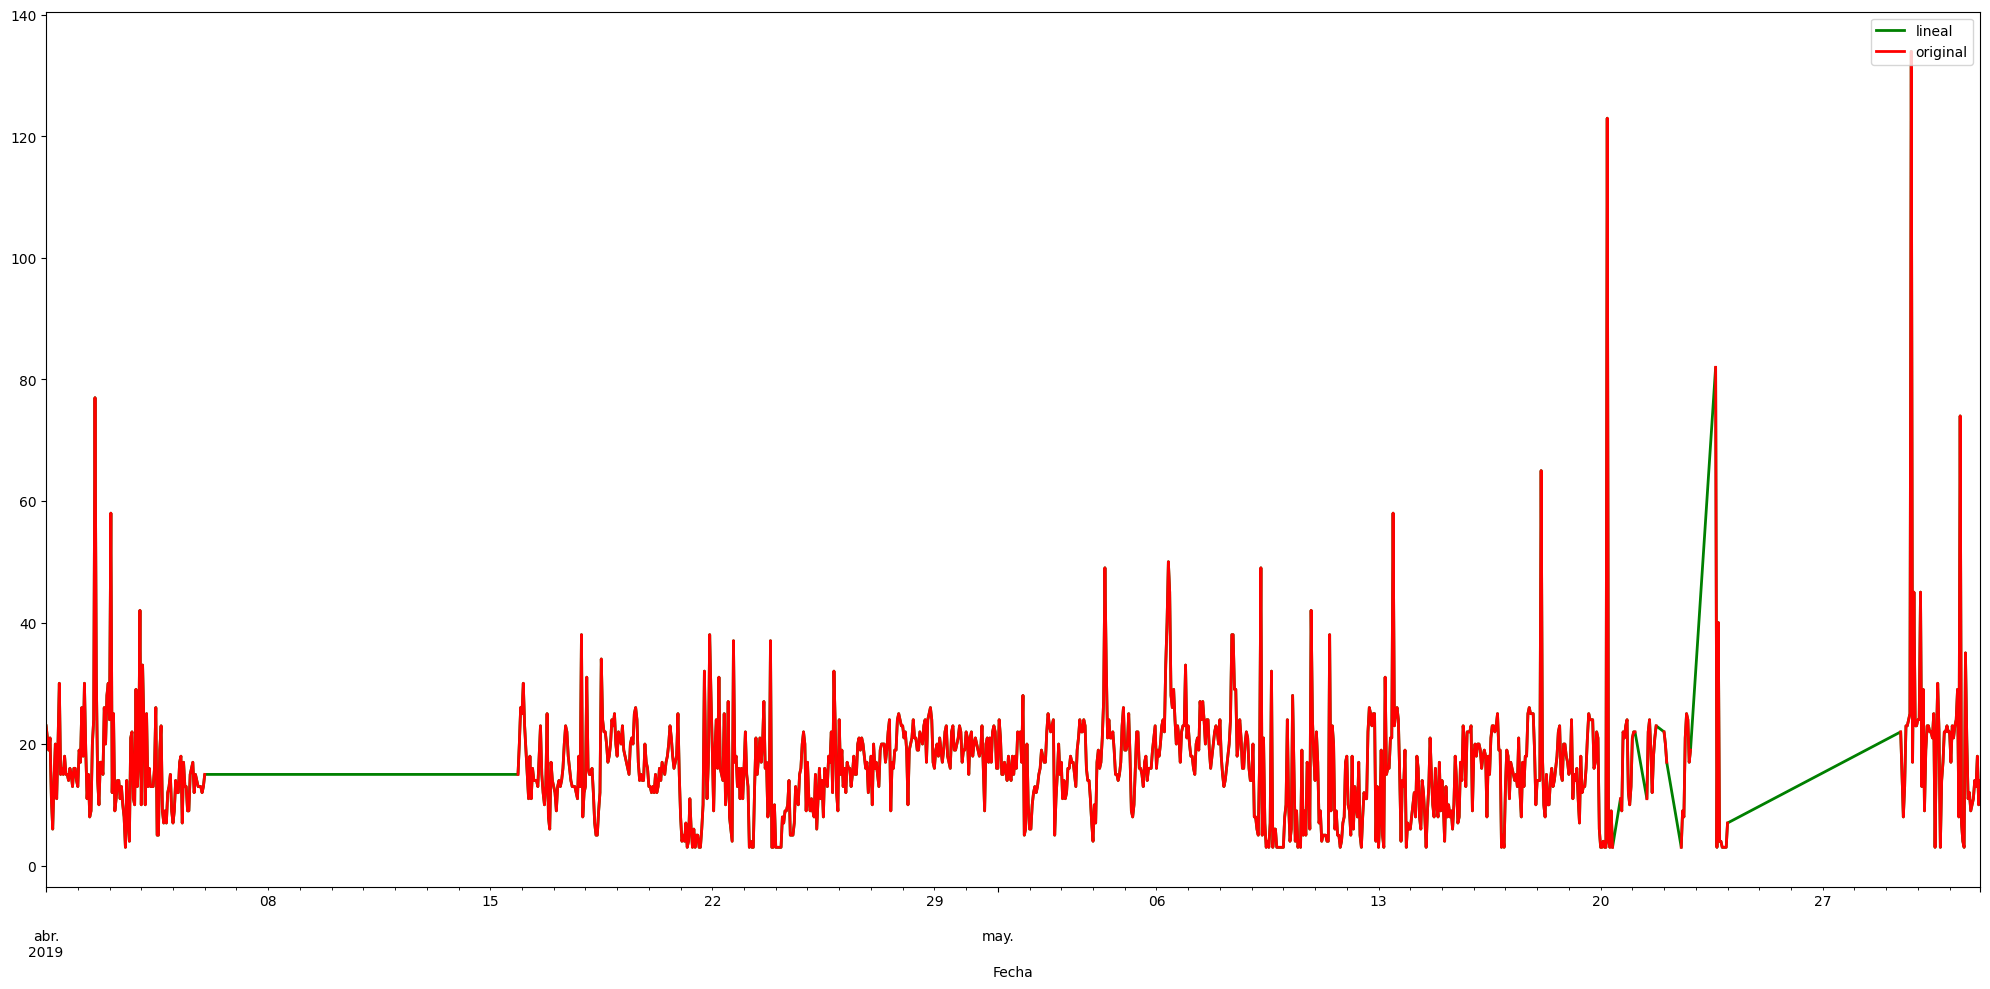

In [21]:
ax = data_lineal['2019-04-01 00:00:00':'2019-05-31 23:00:00']["NOX (µg/m³N)"].plot(color='green',linewidth=2)
data['2019-04-01 00:00:00':'2019-05-31 23:00:00']["NOX (µg/m³N)"].plot(ax=ax,figsize=[20, 10],color='r', linewidth=2)


ax.set_xlabel("Fecha")
ax.legend(loc='upper right', labels = ['lineal','original'])
plt.tight_layout()

In [22]:
# Diccionario para almacenar los resultados de imputación
imputed_datasets = {}

# Probar diferentes números de vecinos
for n in [2, 5, 7, 10]:
    imputer = KNNImputer(n_neighbors=n)
    imputed_data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)
    imputed_data.index = data.index
    imputed_datasets[n] = imputed_data  # Almacenar el resultado en el diccionario
    
    print(f"\nImputación con {n} vecinos:")
    print(imputed_data.head())

data_imputed = imputed_datasets[10]


Imputación con 2 vecinos:
                     NO (µg/m³N)  NO2 (µg/m³N)  SO2 (µg/m³N)  O3 (µg/m³N)  \
Fecha                                                                       
2019-01-01 00:00:00          3.0          18.0          14.0         55.0   
2019-01-01 01:00:00          4.0          19.0          14.0         57.0   
2019-01-01 02:00:00          4.0          20.0          16.0         48.0   
2019-01-01 03:00:00          4.0          18.0          14.0         47.0   
2019-01-01 04:00:00          4.0          12.0          16.0         55.0   

                     TMP (ºC)  HR (% H.R.)  NOX (µg/m³N)  DD (grados)  \
Fecha                                                                   
2019-01-01 00:00:00      11.0         72.0          23.0        295.0   
2019-01-01 01:00:00      11.0         61.0          24.0        292.0   
2019-01-01 02:00:00      10.0         65.0          26.0        299.0   
2019-01-01 03:00:00       9.0         68.0          23.0        302.

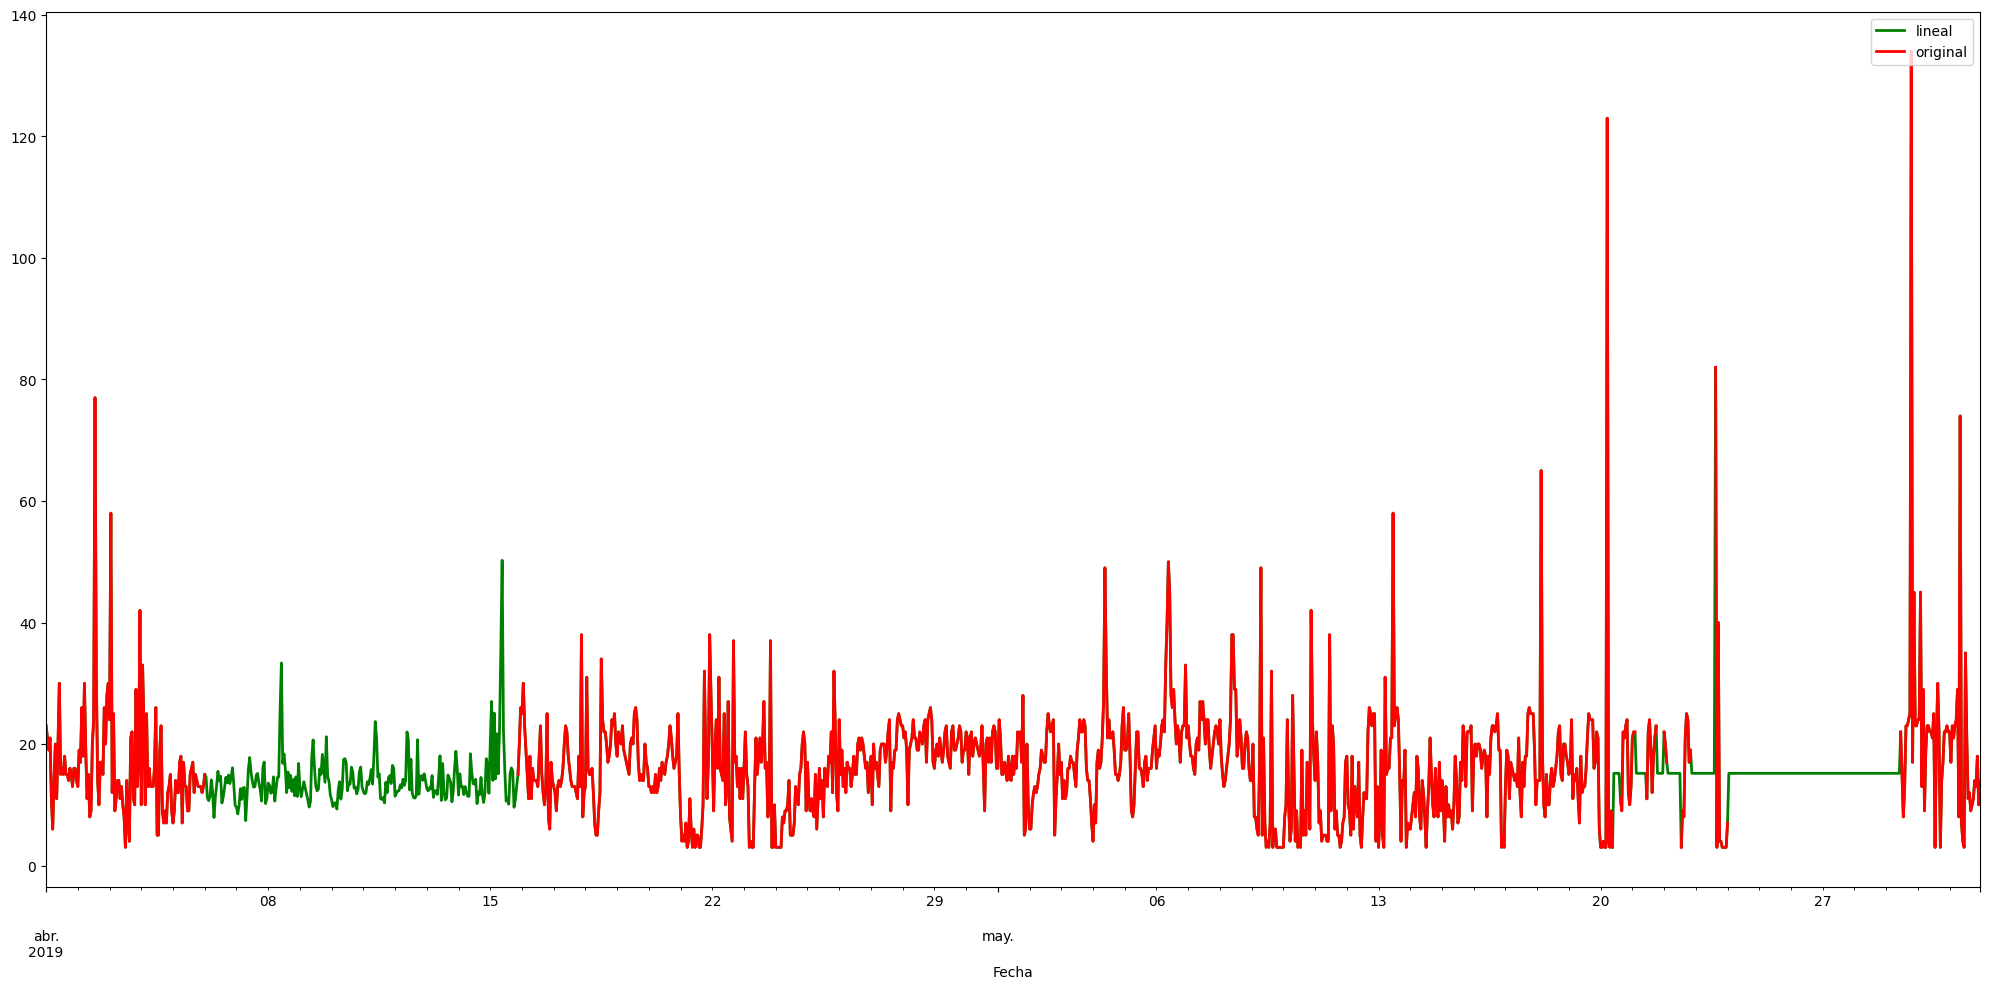

In [23]:
ax = data_imputed['2019-04-01 00:00:00':'2019-05-31 23:00:00']["NOX (µg/m³N)"].plot(color='green',linewidth=2)
data['2019-04-01 00:00:00':'2019-05-31 23:00:00']["NOX (µg/m³N)"].plot(ax=ax,figsize=[20, 10],color='r', linewidth=2)


ax.set_xlabel("Fecha")
ax.legend(loc='upper right', labels = ['lineal','original'])
plt.tight_layout()

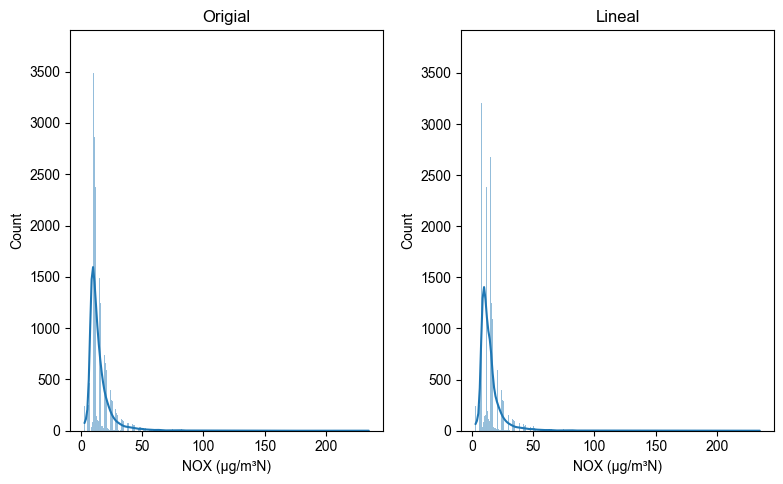

In [24]:
fig, axs = plt.subplots(1, 2, figsize=(8, 5))
series = [data["NOX (µg/m³N)"],data_imputed["NOX (µg/m³N)"]]
titulos = ['Origial','Lineal']
axs = axs.flatten()
sns.set(font_scale = 1)
for df, ax, titulo in  zip(series,axs,titulos):
    sns.histplot(df,kde=True,stat='count', ax=ax)
    ax.set_title(titulo)
fig.tight_layout()
plt.show()

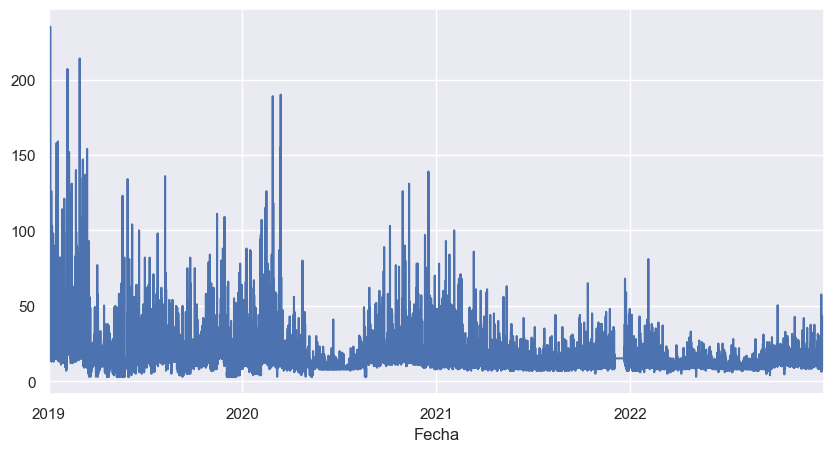

In [25]:
ax = data_imputed["NOX (µg/m³N)"].plot(figsize=(10, 5))


In [26]:
data_imputed.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35064 entries, 2019-01-01 00:00:00 to 2022-12-31 23:00:00
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   NO (µg/m³N)    35064 non-null  float64
 1   NO2 (µg/m³N)   35064 non-null  float64
 2   SO2 (µg/m³N)   35064 non-null  float64
 3   O3 (µg/m³N)    35064 non-null  float64
 4   TMP (ºC)       35064 non-null  float64
 5   HR (% H.R.)    35064 non-null  float64
 6   NOX (µg/m³N)   35064 non-null  float64
 7   DD (grados)    35064 non-null  float64
 8   PRB (mb)       35064 non-null  float64
 9   RS (W/m³)      35064 non-null  float64
 10  VV (m/s)       35064 non-null  float64
 11  C6H6 (µg/m³N)  35064 non-null  float64
 12  C7H8 (µg/m³N)  35064 non-null  float64
 13  XIL (µg/m³N)   35064 non-null  float64
 14  PM10 (µg/m³N)  35064 non-null  float64
dtypes: float64(15)
memory usage: 5.3 MB


In [27]:
data_imputed.head()

,NO (µg/m³N),NO2 (µg/m³N),SO2 (µg/m³N),O3 (µg/m³N),TMP (ºC),HR (% H.R.),NOX (µg/m³N),DD (grados),PRB (mb),RS (W/m³),VV (m/s),C6H6 (µg/m³N),C7H8 (µg/m³N),XIL (µg/m³N),PM10 (µg/m³N)
Fecha,,,,,,,,,,,,,,,
2019-01-01 00:00:00,3.0,18.0,14.0,55.0,11.0,72.0,23.0,295.0,1029.0,3.0,1.0,0.54,0.58,1.56,10.0
2019-01-01 01:00:00,4.0,19.0,14.0,57.0,11.0,61.0,24.0,292.0,1029.0,2.0,1.0,0.84,0.76,1.85,8.0
2019-01-01 02:00:00,4.0,20.0,16.0,48.0,10.0,65.0,26.0,299.0,1029.0,2.0,1.0,0.22,0.57,1.09,12.0
2019-01-01 03:00:00,4.0,18.0,14.0,47.0,9.0,68.0,23.0,302.0,1028.0,3.0,1.0,0.24,0.44,1.11,8.0
2019-01-01 04:00:00,4.0,12.0,16.0,55.0,10.0,64.0,18.0,298.0,1029.0,3.0,1.0,0.73,0.78,1.61,5.0


## Establecer Frecuencia del Dataset

In [28]:
data_imputed.asfreq('D')

,NO (µg/m³N),NO2 (µg/m³N),SO2 (µg/m³N),O3 (µg/m³N),TMP (ºC),HR (% H.R.),NOX (µg/m³N),DD (grados),PRB (mb),RS (W/m³),VV (m/s),C6H6 (µg/m³N),C7H8 (µg/m³N),XIL (µg/m³N),PM10 (µg/m³N)
Fecha,,,,,,,,,,,,,,,
2019-01-01,3.0,18.0,14.0,55.0,11.0,72.0,23.0,295.0,1029.0,3.0,1.0,0.54,0.58,1.56,10.00
2019-01-02,4.0,23.0,14.0,45.0,10.0,93.0,28.0,301.0,1028.0,2.0,1.0,0.53,0.78,1.08,16.00
2019-01-03,4.0,23.0,19.0,38.0,9.0,97.0,29.0,300.0,1026.0,2.0,1.0,0.61,0.78,1.31,9.00
2019-01-04,7.0,36.0,12.0,7.0,9.0,100.0,47.0,279.0,1028.0,4.0,1.0,0.50,0.99,0.84,22.00
2019-01-05,9.0,36.0,11.0,16.0,7.0,100.0,49.0,302.0,1030.0,3.0,1.0,0.41,0.73,0.47,19.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27,2.6,11.2,3.7,12.6,12.0,88.0,15.2,306.0,1028.0,3.0,1.0,0.42,1.10,1.40,23.70
2022-12-28,2.4,9.8,6.0,38.4,10.0,95.0,13.6,302.0,1028.0,3.0,1.0,0.47,0.75,0.88,21.44
2022-12-29,2.2,11.0,2.7,34.9,11.0,100.0,14.4,306.0,1023.0,3.0,1.0,0.34,0.92,0.79,29.53


In [29]:
fechas_esperadas =  pd.date_range(start=data_imputed.index.min(), end=data_imputed.index.max(), freq='D')
fechas_perdidas = fechas_esperadas.difference(data_imputed.index)
fechas_perdidas

DatetimeIndex([], dtype='datetime64[ns]', freq='D')

In [30]:
print(f'Tenemos un tota de {len(fechas_perdidas)} fechas perdidas')

Tenemos un tota de 0 fechas perdidas


In [31]:
data_imputed = data_imputed.reindex(fechas_esperadas)
data_imputed

,NO (µg/m³N),NO2 (µg/m³N),SO2 (µg/m³N),O3 (µg/m³N),TMP (ºC),HR (% H.R.),NOX (µg/m³N),DD (grados),PRB (mb),RS (W/m³),VV (m/s),C6H6 (µg/m³N),C7H8 (µg/m³N),XIL (µg/m³N),PM10 (µg/m³N)
2019-01-01,3.0,18.0,14.0,55.0,11.0,72.0,23.0,295.0,1029.0,3.0,1.0,0.54,0.58,1.56,10.00
2019-01-02,4.0,23.0,14.0,45.0,10.0,93.0,28.0,301.0,1028.0,2.0,1.0,0.53,0.78,1.08,16.00
2019-01-03,4.0,23.0,19.0,38.0,9.0,97.0,29.0,300.0,1026.0,2.0,1.0,0.61,0.78,1.31,9.00
2019-01-04,7.0,36.0,12.0,7.0,9.0,100.0,47.0,279.0,1028.0,4.0,1.0,0.50,0.99,0.84,22.00
2019-01-05,9.0,36.0,11.0,16.0,7.0,100.0,49.0,302.0,1030.0,3.0,1.0,0.41,0.73,0.47,19.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27,2.6,11.2,3.7,12.6,12.0,88.0,15.2,306.0,1028.0,3.0,1.0,0.42,1.10,1.40,23.70
2022-12-28,2.4,9.8,6.0,38.4,10.0,95.0,13.6,302.0,1028.0,3.0,1.0,0.47,0.75,0.88,21.44
2022-12-29,2.2,11.0,2.7,34.9,11.0,100.0,14.4,306.0,1023.0,3.0,1.0,0.34,0.92,0.79,29.53
2022-12-30,2.4,12.5,2.1,30.0,12.0,95.0,16.2,240.0,1023.0,2.0,1.0,0.25,1.22,1.16,27.52


In [32]:
data_anual = pd.DataFrame(data_imputed)
data_anual['Año'] = data_anual.index.year
data_anual

,NO (µg/m³N),NO2 (µg/m³N),SO2 (µg/m³N),O3 (µg/m³N),TMP (ºC),HR (% H.R.),NOX (µg/m³N),DD (grados),PRB (mb),RS (W/m³),VV (m/s),C6H6 (µg/m³N),C7H8 (µg/m³N),XIL (µg/m³N),PM10 (µg/m³N),Año
2019-01-01,3.0,18.0,14.0,55.0,11.0,72.0,23.0,295.0,1029.0,3.0,1.0,0.54,0.58,1.56,10.00,2019
2019-01-02,4.0,23.0,14.0,45.0,10.0,93.0,28.0,301.0,1028.0,2.0,1.0,0.53,0.78,1.08,16.00,2019
2019-01-03,4.0,23.0,19.0,38.0,9.0,97.0,29.0,300.0,1026.0,2.0,1.0,0.61,0.78,1.31,9.00,2019
2019-01-04,7.0,36.0,12.0,7.0,9.0,100.0,47.0,279.0,1028.0,4.0,1.0,0.50,0.99,0.84,22.00,2019
2019-01-05,9.0,36.0,11.0,16.0,7.0,100.0,49.0,302.0,1030.0,3.0,1.0,0.41,0.73,0.47,19.00,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27,2.6,11.2,3.7,12.6,12.0,88.0,15.2,306.0,1028.0,3.0,1.0,0.42,1.10,1.40,23.70,2022
2022-12-28,2.4,9.8,6.0,38.4,10.0,95.0,13.6,302.0,1028.0,3.0,1.0,0.47,0.75,0.88,21.44,2022
2022-12-29,2.2,11.0,2.7,34.9,11.0,100.0,14.4,306.0,1023.0,3.0,1.0,0.34,0.92,0.79,29.53,2022
2022-12-30,2.4,12.5,2.1,30.0,12.0,95.0,16.2,240.0,1023.0,2.0,1.0,0.25,1.22,1.16,27.52,2022


matplotlib.category INFO  Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
matplotlib.category INFO  Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


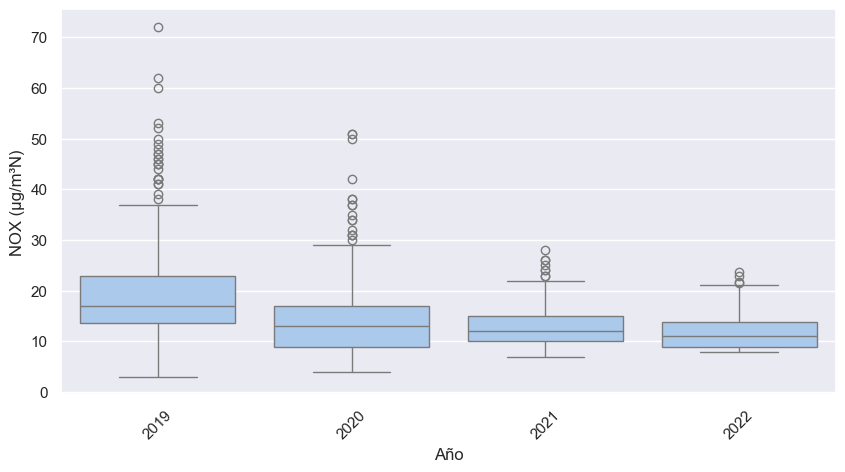

In [33]:
plt.figure(figsize=(10, 5))
sns.set_palette('pastel')

# Gráfico de cajas
sns.boxplot(x='Año', y='NOX (µg/m³N)', data=data_anual)

# Añadir etiquetas y título
plt.xlabel('Año')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x si es necesario
plt.show()

## Estacionalidad de la serie

Si todos los atributos obtienen un p-value menor que 0.05 podremos saber que la serie es estacionaria

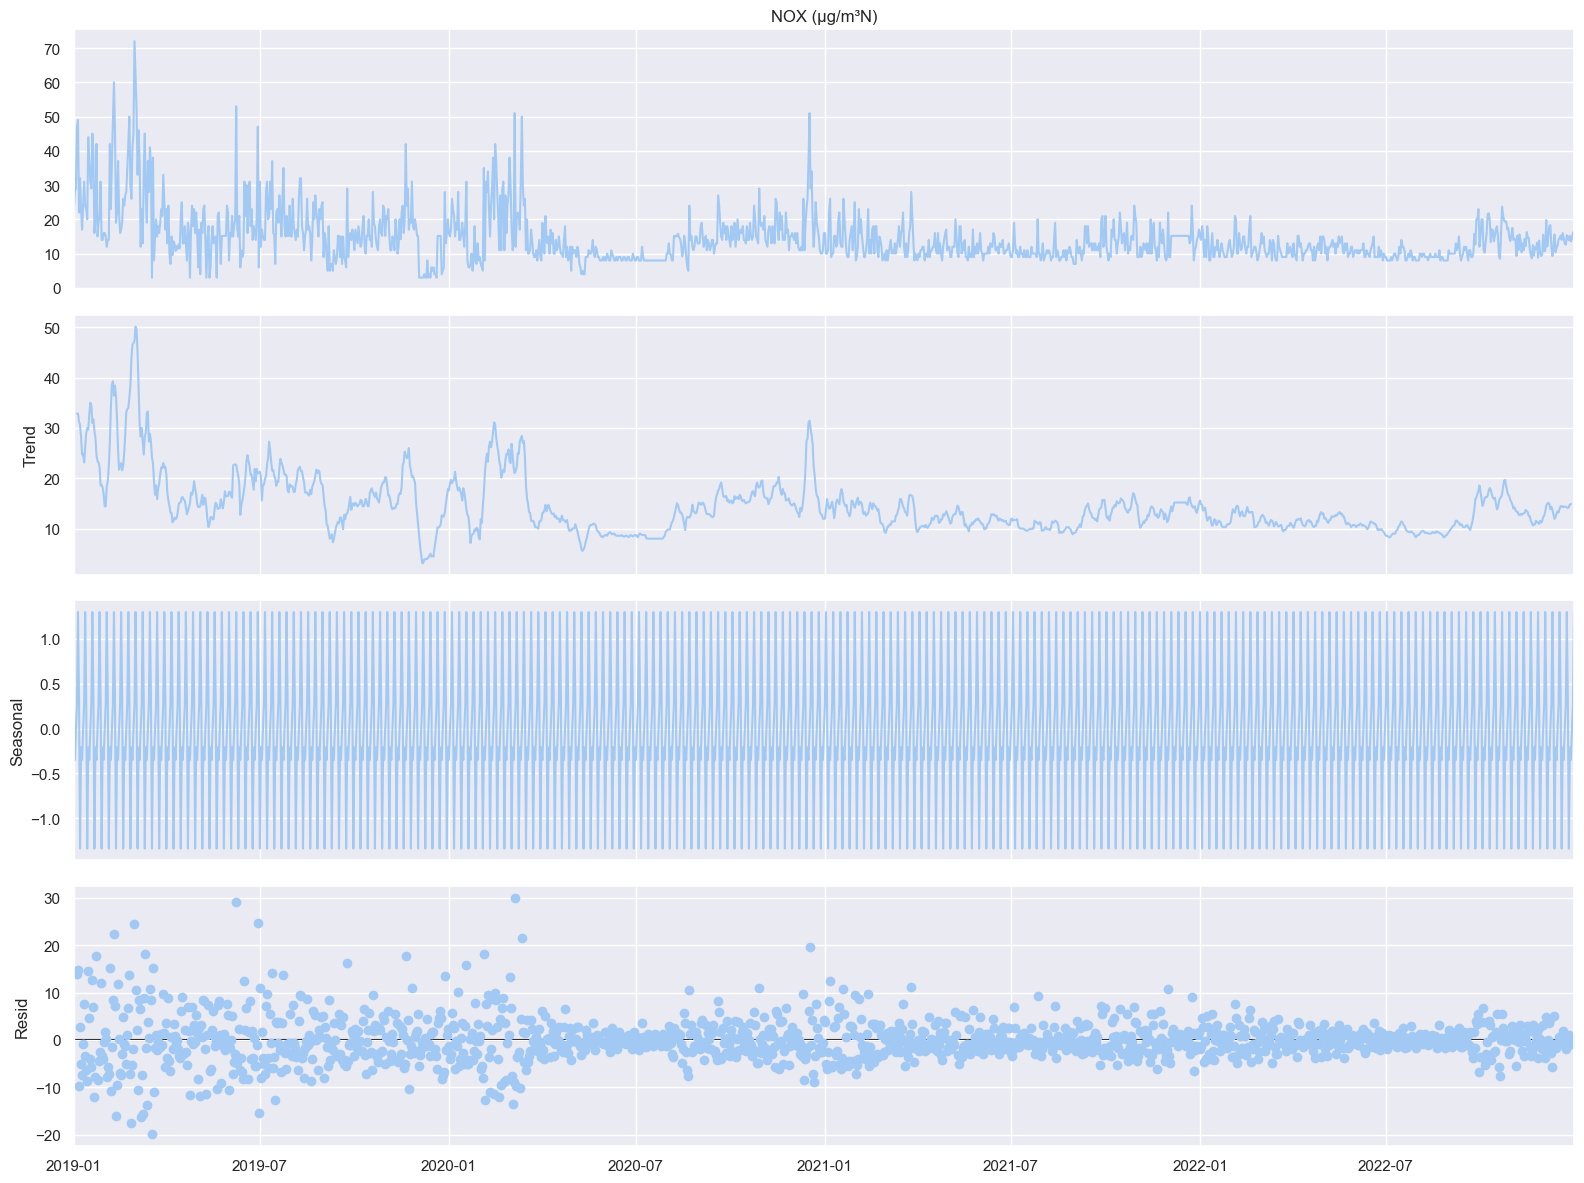

In [34]:
nox_dec = sm.tsa.seasonal_decompose(data_imputed["NOX (µg/m³N)"], model="aditive")
fig = nox_dec.plot()
fig.set_size_inches((16, 12))
# Tight layout to realign things
fig.tight_layout()
plt.show()

In [35]:
result = adfuller(data_imputed['NOX (µg/m³N)'])
print("---- NOX ----")
print('Estadístico ADF : %f' % result[0])
print('p-value: %f' % result[1])
print('Valores críticos:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

---- NOX ----
Estadístico ADF : -4.296671
p-value: 0.000450
Valores críticos:
	1%: -3.435
	5%: -2.864
	10%: -2.568


## Transformaciones 

# Entrenamiento y Validación

## Division Train y Test

In [36]:

test_steps = 7
train = data_imputed[:-test_steps]  # Todo menos las últimas 7 fechas
test = data_imputed[-test_steps:]  # Últimas 7 fechas
print(f'Tamaño del conjunto de training es %i' %len(train))
print(f'Tamaño del conjunto de test es %i' %len(test))
print(f'El conjunto de training va de {min(train.index)} y {max(train.index)}')
print(f'El conjunto de test va de {min(test.index)} y {max(test.index)}')

Tamaño del conjunto de training es 1454
Tamaño del conjunto de test es 7
El conjunto de training va de 2019-01-01 00:00:00 y 2022-12-24 00:00:00
El conjunto de test va de 2022-12-25 00:00:00 y 2022-12-31 00:00:00


In [36]:
train.tail()

,NO (µg/m³N),NO2 (µg/m³N),SO2 (µg/m³N),O3 (µg/m³N),TMP (ºC),HR (% H.R.),NOX (µg/m³N),DD (grados),PRB (mb),RS (W/m³),VV (m/s),C6H6 (µg/m³N),C7H8 (µg/m³N),XIL (µg/m³N),PM10 (µg/m³N)
2022-12-20,4.3,9.5,3.0,35.40,14.0,100.0,16.0,298.0,1025.0,4.0,1.0,0.51,0.89,0.51,16.80
2022-12-21,3.1,9.8,4.2,27.07,12.0,100.0,14.5,228.0,1022.0,4.0,1.0,0.53,1.25,0.83,16.67
2022-12-22,2.6,8.9,8.0,38.42,13.0,84.0,13.0,259.0,1024.0,3.0,1.0,0.46,1.28,0.73,20.24
2022-12-23,2.3,9.0,6.0,14.50,15.0,77.0,12.6,226.0,1025.0,2.0,1.0,0.35,0.88,0.78,13.45
2022-12-24,2.7,11.3,2.2,11.10,13.0,100.0,15.4,305.0,1022.0,3.0,1.0,0.21,1.65,1.40,21.26


In [37]:
test

,NO (µg/m³N),NO2 (µg/m³N),SO2 (µg/m³N),O3 (µg/m³N),TMP (ºC),HR (% H.R.),NOX (µg/m³N),DD (grados),PRB (mb),RS (W/m³),VV (m/s),C6H6 (µg/m³N),C7H8 (µg/m³N),XIL (µg/m³N),PM10 (µg/m³N)
2022-12-25,2.6,11.0,3.8,5.8,12.0,100.0,14.9,314.0,1020.0,3.0,1.0,0.52,0.88,3.75,13.86
2022-12-26,2.4,10.3,2.9,18.8,12.0,90.0,13.9,288.0,1021.0,3.0,1.0,0.30,1.02,0.84,18.11
2022-12-27,2.6,11.2,3.7,12.6,12.0,88.0,15.2,306.0,1028.0,3.0,1.0,0.42,1.10,1.40,23.70
2022-12-28,2.4,9.8,6.0,38.4,10.0,95.0,13.6,302.0,1028.0,3.0,1.0,0.47,0.75,0.88,21.44
2022-12-29,2.2,11.0,2.7,34.9,11.0,100.0,14.4,306.0,1023.0,3.0,1.0,0.34,0.92,0.79,29.53
2022-12-30,2.4,12.5,2.1,30.0,12.0,95.0,16.2,240.0,1023.0,2.0,1.0,0.25,1.22,1.16,27.52
2022-12-31,2.4,12.3,2.8,35.6,12.0,86.0,16.0,312.0,1025.0,3.0,1.0,0.57,0.68,0.97,43.86


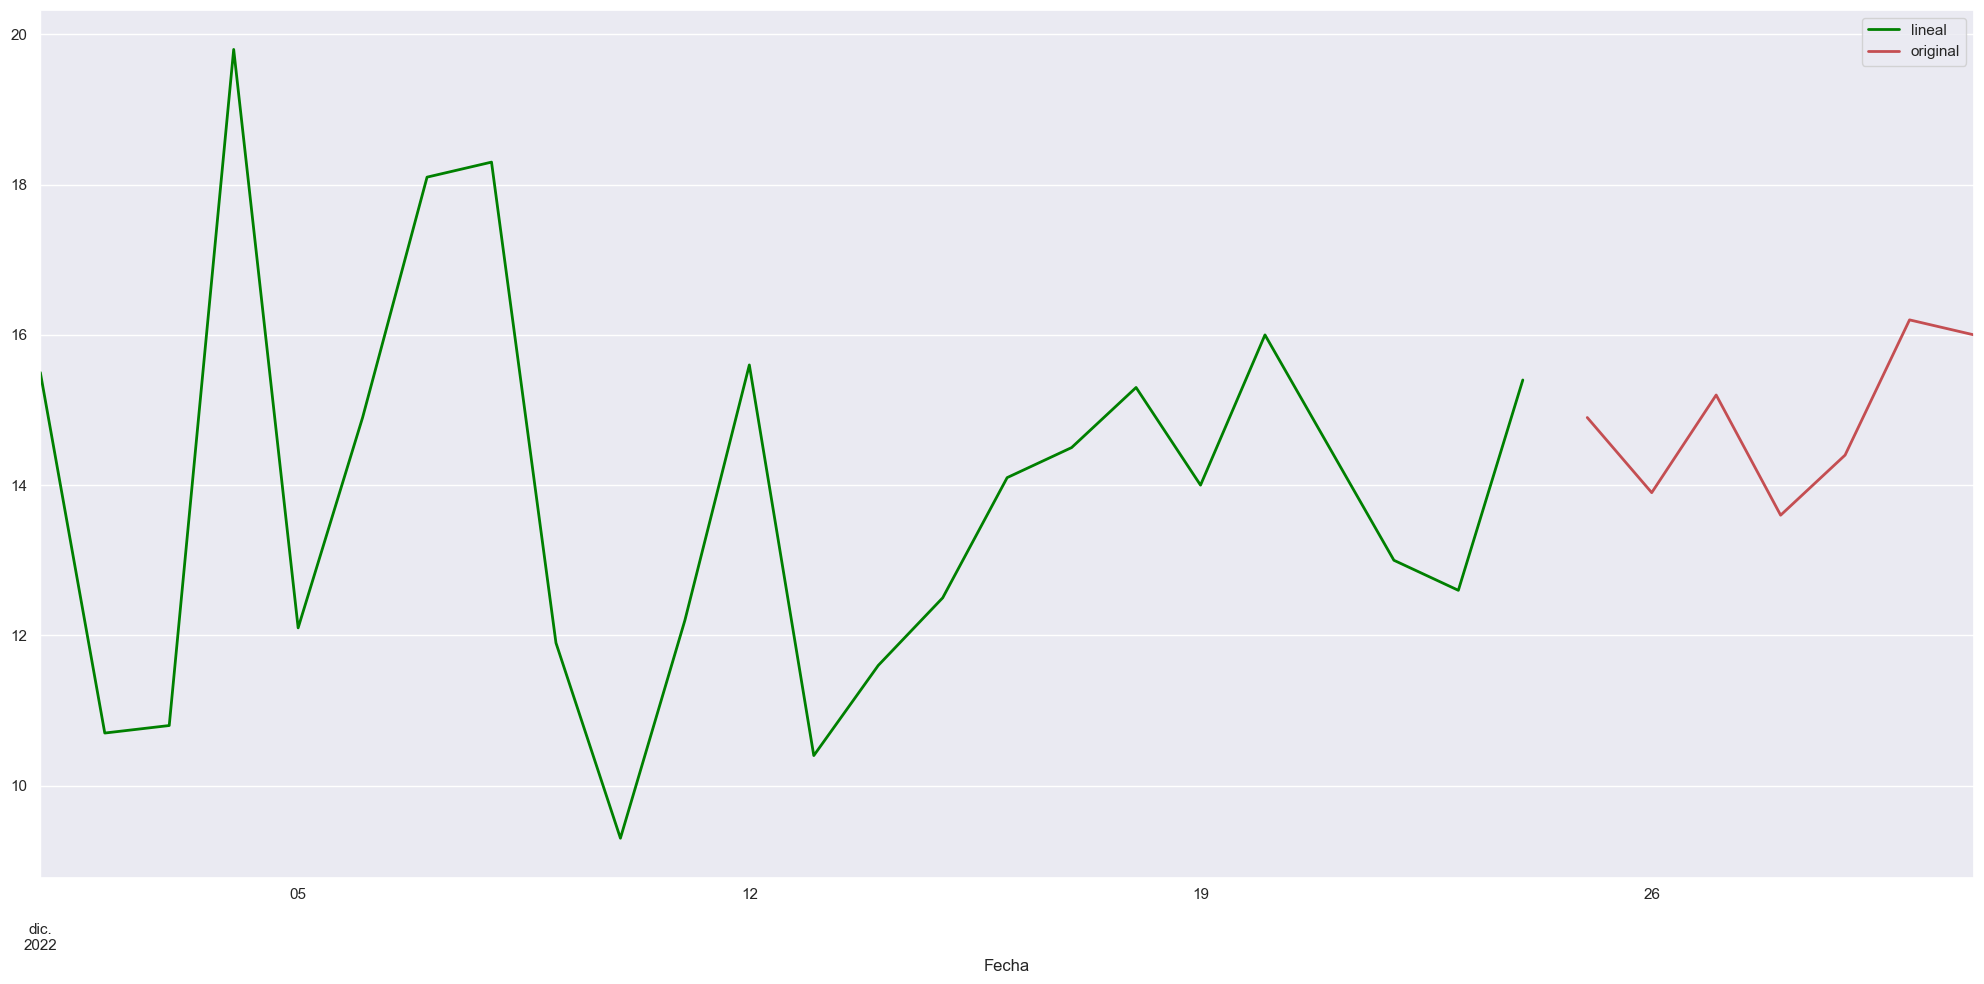

In [38]:
ax = train['2022-12-01':'2022-12-25']["NOX (µg/m³N)"].plot(color='green',linewidth=2)
test['2022-12-25':'2022-12-31']["NOX (µg/m³N)"].plot(ax=ax,figsize=[20, 10],color='r', linewidth=2)


ax.set_xlabel("Fecha")
ax.legend(loc='upper right', labels = ['lineal','original'])
plt.tight_layout()

## Predicción Directa

### LGBM

#### Definir Grids

In [39]:
param_grid = {
    'n_estimators': [100,150],          # Número de árboles
    'learning_rate': [0.01, 0.02],      # Tasa de aprendizaje
    'max_depth': [4,5],                 # Máxima profundidad del árbol
    'num_leaves': [15, 31],             # Número de hojas
    'min_child_samples': [10, 20]       # Tamaño mínimo de muestra en nodos hoja
}

In [40]:
lags_grid = [1,4,5,7,12,14,15,21,24,30,31]

#### Forecaster 

In [41]:
forecaster_direct = ForecasterAutoregDirect(
                regressor = LGBMRegressor(random_state=SEED, n_jobs=-1, verbose = -1),
                lags = 6,
                steps = 7
             )


In [42]:
results_grid = grid_search_forecaster(
                   forecaster         = forecaster_direct,
                   y                  = train["NOX (µg/m³N)"],
                   param_grid         = param_grid,
                   lags_grid          = lags_grid,
                   steps              = 7,
                   metric             = 'root_mean_squared_scaled_error',
                   initial_train_size = 50,
                   fixed_train_size   = False,
                   refit              = False,
                   skip_folds         = None,
                   return_best        = True,
                   n_jobs             = 'auto',
                   verbose            = False
               )

Number of models compared: 352.


lags grid:   9%|▉         | 1/11 [01:21<13:37, 81.74s/it]


KeyboardInterrupt: 

In [406]:
results_grid

,lags,lags_label,params,root_mean_squared_scaled_error,learning_rate,max_depth,min_child_samples,n_estimators,num_leaves
0,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]","{'learning_rate': 0.01, 'max_depth': 5, 'min_c...",1.172719,0.010,5.0,10.0,100.0,15.0
29,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]","{'learning_rate': 0.001, 'max_depth': 7, 'min_...",1.172719,0.001,7.0,20.0,100.0,31.0
28,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]","{'learning_rate': 0.001, 'max_depth': 7, 'min_...",1.172719,0.001,7.0,20.0,100.0,15.0
27,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]","{'learning_rate': 0.001, 'max_depth': 7, 'min_...",1.172719,0.001,7.0,10.0,200.0,31.0
26,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]","{'learning_rate': 0.001, 'max_depth': 7, 'min_...",1.172719,0.001,7.0,10.0,200.0,15.0
25,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]","{'learning_rate': 0.001, 'max_depth': 7, 'min_...",1.172719,0.001,7.0,10.0,100.0,31.0
24,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]","{'learning_rate': 0.001, 'max_depth': 7, 'min_...",1.172719,0.001,7.0,10.0,100.0,15.0
23,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]","{'learning_rate': 0.001, 'max_depth': 5, 'min_...",1.172719,0.001,5.0,20.0,200.0,31.0
22,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]","{'learning_rate': 0.001, 'max_depth': 5, 'min_...",1.172719,0.001,5.0,20.0,200.0,15.0
21,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]","{'learning_rate': 0.001, 'max_depth': 5, 'min_...",1.172719,0.001,5.0,20.0,100.0,31.0


In [407]:
forecaster_direct

ForecasterAutoregDirect 
Regressor: LGBMRegressor(learning_rate=0.01, max_depth=5, min_child_samples=10, n_jobs=-1,
              num_leaves=15, random_state=123, verbose=-1) 
Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14] 
Transformer for y: None 
Transformer for exog: None 
Weight function included: False 
Window size: 14 
Maximum steps predicted: 7 
Exogenous included: False 
Exogenous variables names: None 
Training range: [Timestamp('2019-01-01 00:00:00'), Timestamp('2022-12-24 00:00:00')] 
Training index type: DatetimeIndex 
Training index frequency: D 
Regressor parameters: {'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 1.0, 'importance_type': 'split', 'learning_rate': 0.01, 'max_depth': 5, 'min_child_samples': 10, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 100, 'n_jobs': -1, 'num_leaves': 15, 'objective': None, 'random_state': 123, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'subsample': 1.0, 'subsample_for_bin': 200000, 'subsample_freq':

#### Resultados

In [ ]:
predicciones_direct = forecaster_direct.predict()
predicciones_direct

2022-12-25    14.053999
2022-12-26    14.102763
2022-12-27    14.595220
2022-12-28    14.619646
2022-12-29    14.620813
2022-12-30    14.598955
2022-12-31    15.043267
Name: pred, dtype: float64

In [409]:
error_rmse_direct = root_mean_squared_error(
                y_true = test["NOX (µg/m³N)"],
                y_pred = predicciones_direct
            )
error_rmsse_direct = root_mean_squared_scaled_error(
                y_true = test["NOX (µg/m³N)"],
                y_pred = predicciones_direct,
                y_train = train["NOX (µg/m³N)"]
            )
mae_direct = mean_absolute_error(
    y_true=test["NOX (µg/m³N)"],
    y_pred=predicciones_direct
)
print(f"RMSE: {error_rmse_direct:.3f}")
print(f"RMSSE: {error_rmsse_direct:.3f}")
print(f"MAE: {mae_direct:.3f}")

RMSE: 0.902
RMSSE: 0.129
MAE: 0.779


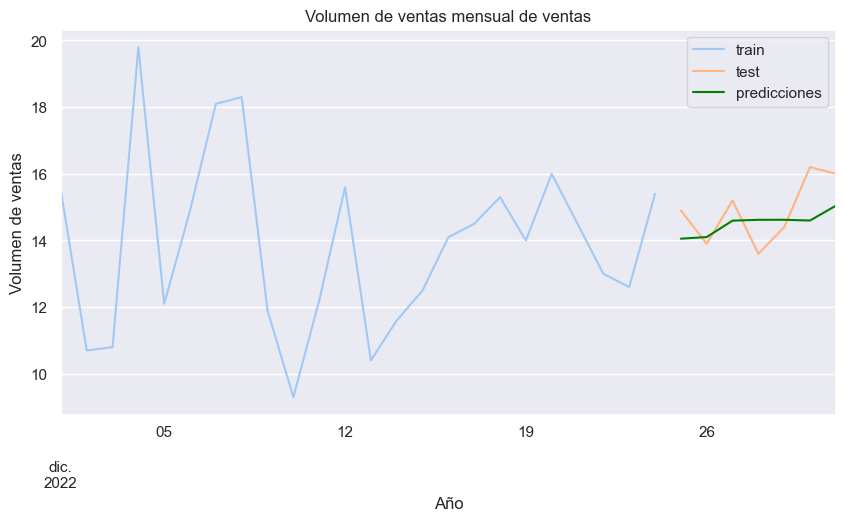

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
train["2022-12-01" : "2022-12-25"]["NOX (µg/m³N)"].plot(ax=ax, label='train')
test["NOX (µg/m³N)"].plot(ax=ax, label='test')
predicciones_direct.plot(ax=ax, label='predicciones', color='green')
ax.set_xlabel('Año')
ax.set_ylabel('Volumen de ventas')
ax.set_title('Volumen de ventas mensual de ventas')
ax.legend()

### Random Forest

#### Param Grid

In [411]:
param_grid = {
    'regressor__n_estimators': [50, 100],
    'regressor__verbose': -1,  
    'max_depth': [5, 10],           # Máxima profundidad de los árboles
    'min_samples_split': [2, 5],          # Número mínimo de muestras para dividir un nodo
    'min_samples_leaf': [1, 2],           # Número mínimo de muestras en un nodo hoja
    'bootstrap': [True, False]            # Si se usa bootstrap para construir los árboles
}


In [412]:
lags_grid = [1,4,5,7,12,14,15,21,24,30,31]

#### Forecaster

In [413]:
forecaster_direct = ForecasterAutoregDirect(
                regressor = RandomForestRegressor(random_state=SEED, n_jobs=-1, verbose = -1),
                lags = 6,
                steps = 7
             )

In [414]:
results_grid = grid_search_forecaster(
                   forecaster         = forecaster_direct,
                   y                  = train["NOX (µg/m³N)"],
                   param_grid         = param_grid,
                   lags_grid          = lags_grid,
                   steps              = 7,
                   metric             = 'root_mean_squared_scaled_error',
                   initial_train_size = 20,
                   fixed_train_size   = False,
                   refit              = False,
                   skip_folds         = None,
                   return_best        = True,
                   n_jobs             = 'auto',
                   verbose            = False
               )

Number of models compared: 256.


lags grid:   0%|          | 0/8 [00:10<?, ?it/s]


InvalidParameterError: The 'verbose' parameter of RandomForestRegressor must be an int in the range [0, inf), an instance of 'bool' or an instance of 'numpy.bool_'. Got -1 instead.

In [ ]:
results_grid

In [ ]:
forecaster_direct

#### Resultados

In [ ]:
predicciones_direct = forecaster_direct.predict()
predicciones_direct

In [ ]:
error_rmse_direct = root_mean_squared_error(
                y_true = test["NOX (µg/m³N)"],
                y_pred = predicciones_direct
            )
error_rmsse_direct = root_mean_squared_scaled_error(
                y_true = test["NOX (µg/m³N)"],
                y_pred = predicciones_direct,
                y_train = train["NOX (µg/m³N)"]
            )
mae_direct = mean_absolute_error(
    y_true=test["NOX (µg/m³N)"],
    y_pred=predicciones_direct
)
print(f"RMSE: {error_rmse_direct:.3f}")
print(f"RMSSE: {error_rmsse_direct:.3f}")
print(f"MAE: {mae_direct:.3f}")

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
train["2022-12-01" : "2022-12-25"]["NOX (µg/m³N)"].plot(ax=ax, label='train')
test["NOX (µg/m³N)"].plot(ax=ax, label='test')
predicciones_direct.plot(ax=ax, label='predicciones', color='green')
ax.set_xlabel('Año')
ax.set_ylabel('Volumen de ventas')
ax.set_title('Volumen de ventas mensual de ventas')
ax.legend()

### XGBoost

#### Param Grid

In [ ]:
param_grid_xgb = {
    'n_estimators': [100, 200],           # Número de árboles
    'learning_rate': [0.01, 0.1, 0.2],    # Tasa de aprendizaje
    'max_depth': [3, 5, 7],                # Máxima profundidad del árbol
    'subsample': [0.8, 1.0],               # Fracción de muestras usadas en cada árbol
    'colsample_bytree': [0.8, 1.0],        # Fracción de características usadas en cada árbol
    'min_child_weight': [1, 2, 3],         # Controla la complejidad de cada árbol
    'gamma': [0, 0.1, 0.2]                # Regularización en cada nodo del árbol
}


In [ ]:
lags_grid = [1,4,5,7,12,14,15,21,24,30,31]

#### Forecaster

In [ ]:
forecaster_direct = ForecasterAutoregDirect(
                regressor = xgb.XGBRegressor(random_state=SEED, n_jobs=-1, verbose = -1),
                lags = 6,
                steps = 7
             )

In [ ]:
results_grid = grid_search_forecaster(
                   forecaster         = forecaster_direct,
                   y                  = train["NOX (µg/m³N)"],
                   param_grid         = param_grid,
                   lags_grid          = lags_grid,
                   steps              = 7,
                   metric             = 'root_mean_squared_scaled_error',
                   initial_train_size = 20,
                   fixed_train_size   = False,
                   refit              = False,
                   skip_folds         = None,
                   return_best        = True,
                   n_jobs             = 'auto',
                   verbose            = False
               )

In [ ]:
results_grid

In [ ]:
forecaster_direct

#### Resultados

In [ ]:
predicciones_direct = forecaster_direct.predict()
predicciones_direct

In [ ]:
error_rmse_direct = root_mean_squared_error(
                y_true = test["NOX (µg/m³N)"],
                y_pred = predicciones_direct
            )
error_rmsse_direct = root_mean_squared_scaled_error(
                y_true = test["NOX (µg/m³N)"],
                y_pred = predicciones_direct,
                y_train = train["NOX (µg/m³N)"]
            )
mae_direct = mean_absolute_error(
    y_true=test["NOX (µg/m³N)"],
    y_pred=predicciones_direct
)
print(f"RMSE: {error_rmse_direct:.3f}")
print(f"RMSSE: {error_rmsse_direct:.3f}")
print(f"MAE: {mae_direct:.3f}")

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
train["2022-12-01" : "2022-12-25"]["NOX (µg/m³N)"].plot(ax=ax, label='train')
test["NOX (µg/m³N)"].plot(ax=ax, label='test')
predicciones_direct.plot(ax=ax, label='predicciones', color='green')
ax.set_xlabel('Año')
ax.set_ylabel('Volumen de ventas')
ax.set_title('Volumen de ventas mensual de ventas')
ax.legend()

### SVM 

#### Param Grid

In [ ]:
param_grid_svr = {
    'C': [0.1, 1, 10],                   # Penalización por error
    'epsilon': [0.01, 0.1, 0.2],         # Margen de tolerancia
    'kernel': ['linear', 'rbf', 'poly'], # Tipo de kernel
    'gamma': ['scale', 'auto'],          # Función de kernel
    'degree': [3, 5]                     # Solo para el kernel 'poly': grado del polinomio
}


In [ ]:
lags_grid = [1,4,5,7,12,14,15,21,24,30,31]

#### Forecaster

In [ ]:
forecaster_direct = ForecasterAutoregDirect(
                regressor = SVR(random_state=SEED, n_jobs=-1, verbose = -1),
                lags = 6,
                steps = 7
             )

In [ ]:
results_grid = grid_search_forecaster(
                   forecaster         = forecaster_direct,
                   y                  = train["NOX (µg/m³N)"],
                   param_grid         = param_grid,
                   lags_grid          = lags_grid,
                   steps              = 7,
                   metric             = 'root_mean_squared_scaled_error',
                   initial_train_size = 20,
                   fixed_train_size   = False,
                   refit              = False,
                   skip_folds         = None,
                   return_best        = True,
                   n_jobs             = 'auto',
                   verbose            = False
               )

In [ ]:
results_grid

In [ ]:
forecaster_direct

#### Resultados

In [ ]:
predicciones_direct = forecaster_direct.predict()
predicciones_direct

In [ ]:
error_rmse_direct = root_mean_squared_error(
                y_true = test["NOX (µg/m³N)"],
                y_pred = predicciones_direct
            )
error_rmsse_direct = root_mean_squared_scaled_error(
                y_true = test["NOX (µg/m³N)"],
                y_pred = predicciones_direct,
                y_train = train["NOX (µg/m³N)"]
            )
mae_direct = mean_absolute_error(
    y_true=test["NOX (µg/m³N)"],
    y_pred=predicciones_direct
)
print(f"RMSE: {error_rmse_direct:.3f}")
print(f"RMSSE: {error_rmsse_direct:.3f}")
print(f"MAE: {mae_direct:.3f}")

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
train["2022-12-01" : "2022-12-25"]["NOX (µg/m³N)"].plot(ax=ax, label='train')
test["NOX (µg/m³N)"].plot(ax=ax, label='test')
predicciones_direct.plot(ax=ax, label='predicciones', color='green')
ax.set_xlabel('Año')
ax.set_ylabel('Volumen de ventas')
ax.set_title('Volumen de ventas mensual de ventas')
ax.legend()

## Predicción Recursiva

In [ ]:
from itertools import product
from sklearn.ensemble import RandomForestRegressor
from skforecast.ForecasterAutoregMultiSeries import ForecasterAutoregMultiSeries
from sklearn.metrics import mean_squared_error
import numpy as np

# Definir el espacio de búsqueda para los hiperparámetros
param_grid = {
    'n_estimators': [200, 300, 500],
    'max_depth': [10, 8],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'lags': [2, 3, 7]  # Añadimos lags como parte del espacio de búsqueda
}

# Generar todas las combinaciones de hiperparámetros y lags
param_combinations = list(product(
    param_grid['n_estimators'],
    param_grid['max_depth'],
    param_grid['min_samples_split'],
    param_grid['min_samples_leaf'],
    param_grid['lags']
))

# Variables para almacenar los mejores resultados
best_params = None
best_rmse = np.inf

# Búsqueda manual
for params in param_combinations:
    print(f"Probando hiperparámetros: {params}")
    regressor = RandomForestRegressor(
        n_estimators=params[0],
        max_depth=params[1],
        min_samples_split=params[2],
        min_samples_leaf=params[3],
        random_state=SEED,
        n_jobs=-1
    )
    
    # Crear y entrenar el modelo con los lags correspondientes
    forecaster = ForecasterAutoregMultiSeries(
        regressor=regressor,
        lags=params[4],  # Configurar los lags
        differentiation=None
    )
    forecaster.fit(train)

    # Generar predicciones
    predicciones_rec = forecaster.predict(steps=7)
    
    # Calcular el error RMSE para la serie 'NOX (µg/m³N)'
    rmse = np.sqrt(mean_squared_error(
        y_true=test['NOX (µg/m³N)'],
        y_pred=predicciones_rec['NOX (µg/m³N)']
    ))

    error_rmsse_direct = root_mean_squared_scaled_error(
                y_true = test["NOX (µg/m³N)"],
                y_pred = predicciones_rec,
                y_train = train["NOX (µg/m³N)"]
    )
    
    mae_direct = mean_absolute_error(
        y_true=test["NOX (µg/m³N)"],
        y_pred=predicciones_rec
    )

    print(f"RMSE para los parámetros {params}: {rmse:.3f}")
    print(f"RMSE para los parámetros {params}: {rmse:.3f}")
    print(f"RMSE para los parámetros {params}: {rmse:.3f}")

    # Actualizar los mejores parámetros si encontramos un RMSE menor
    if rmse < best_rmse:
        best_rmse = rmse
        best_params = params

# Resultados finales
print(f"\nMejores parámetros: {best_params}")
print(f"Mejor RMSE: {best_rmse:.3f}")

Probando hiperparámetros: (200, 10, 2, 1, 2)
RMSE para los parámetros (200, 10, 2, 1, 2): 0.947
Probando hiperparámetros: (200, 10, 2, 1, 3)
RMSE para los parámetros (200, 10, 2, 1, 3): 0.767
Probando hiperparámetros: (200, 10, 2, 1, 4)
RMSE para los parámetros (200, 10, 2, 1, 4): 0.861
Probando hiperparámetros: (200, 10, 2, 2, 2)
RMSE para los parámetros (200, 10, 2, 2, 2): 0.947
Probando hiperparámetros: (200, 10, 2, 2, 3)
RMSE para los parámetros (200, 10, 2, 2, 3): 0.762
Probando hiperparámetros: (200, 10, 2, 2, 4)
RMSE para los parámetros (200, 10, 2, 2, 4): 0.867
Probando hiperparámetros: (200, 10, 5, 1, 2)
RMSE para los parámetros (200, 10, 5, 1, 2): 0.947
Probando hiperparámetros: (200, 10, 5, 1, 3)
RMSE para los parámetros (200, 10, 5, 1, 3): 0.767
Probando hiperparámetros: (200, 10, 5, 1, 4)
RMSE para los parámetros (200, 10, 5, 1, 4): 0.861
Probando hiperparámetros: (200, 10, 5, 2, 2)
RMSE para los parámetros (200, 10, 5, 2, 2): 0.947
Probando hiperparámetros: (200, 10, 5, 2

In [81]:
# Crear el modelo con los mejores parámetros encontrados
best_regressor = RandomForestRegressor(
    n_estimators=best_params[0],
    max_depth=best_params[1],
    min_samples_split=best_params[2],
    min_samples_leaf=best_params[3],
    random_state=SEED,
    n_jobs=-1
)

# Entrenar el modelo con los mejores parámetros
best_forecaster = ForecasterAutoregMultiSeries(
    regressor=best_regressor,
    lags=best_params[4],  # Usar el mejor número de lags
    differentiation=None  # Usar el parámetro de diferenciación adecuado
)
best_forecaster.fit(train)

# Generar predicciones con el modelo ajustado
predicciones_rec_best = best_forecaster.predict(steps=7)

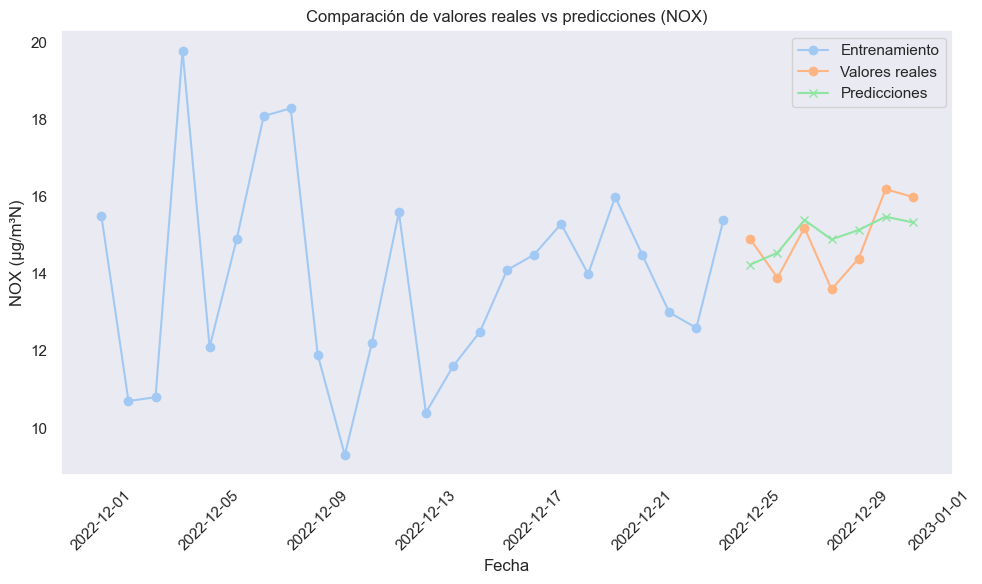

In [82]:
import matplotlib.pyplot as plt

# Crear un DataFrame para facilitar la comparación
df_plot_best = pd.DataFrame({
    'Valores reales': test['NOX (µg/m³N)'],
    'Predicciones': predicciones_rec_best['NOX (µg/m³N)']
}).reset_index()

# Graficar los valores reales vs predicciones
plt.figure(figsize=(10, 6))
plt.plot(train['2022-12-01':'2022-12-24']["NOX (µg/m³N)"].index, train['2022-12-01':'2022-12-24']["NOX (µg/m³N)"], label="Entrenamiento", marker='o')
plt.plot(df_plot_best['index'], df_plot_best['Valores reales'], label='Valores reales', marker='o')
plt.plot(df_plot_best['index'], df_plot_best['Predicciones'], label='Predicciones', marker='x')
plt.title('Comparación de valores reales vs predicciones (NOX)')
plt.xlabel('Fecha')
plt.ylabel('NOX (µg/m³N)')
plt.legend()
plt.grid()
plt.xticks(rotation=45)  # Rotar etiquetas del eje X si son fechas
plt.tight_layout()
plt.show()